<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 48px;"><strong>Assignment 1</strong></h1>
    <h2 style="color:#7D3C98;">Implementing & Evaluating Data Structures for Maze Generation</h2>
    <h2 style="color:#7D3C98;"><strong>COSC2673</strong> Algorithms & Analysis</h2>
    <h3 style="color:#D2B4DE; margin-top: 20px;">(Undergraduate Level)</h3>
    <h3 style="background: linear-gradient(to right, #7D3C98, #D7BDE2); -webkit-background-clip: text; color: solid;">By Oisin Sol Emlyn Aeonn</em></h3>
    <h4 style="color:#BB8FCE;">Student ID: s3952320</h4>
</div>

In [6]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Average Runtime for Data Structure Implementations</h1>

In [7]:
totalRuntimeAverageDF = pd.read_excel('dataGen/empiricalData.xlsx', sheet_name='totalRuntimeAverage')
totalRuntimeAverageDF.head()

,configNo,mazeSize,totalCells,totalArrayAverage,totalAdjacencyMatrixAverage,totalAdjacencyListAverage
0,1,5x5,25,0.003,0.006,0.006
1,2,25x25,625,0.007,0.100,0.010
2,3,35x35,1225,0.014,0.260,0.026
3,4,50x50,2500,0.030,1.000,0.050
4,5,75x75,5625,0.060,4.600,0.100


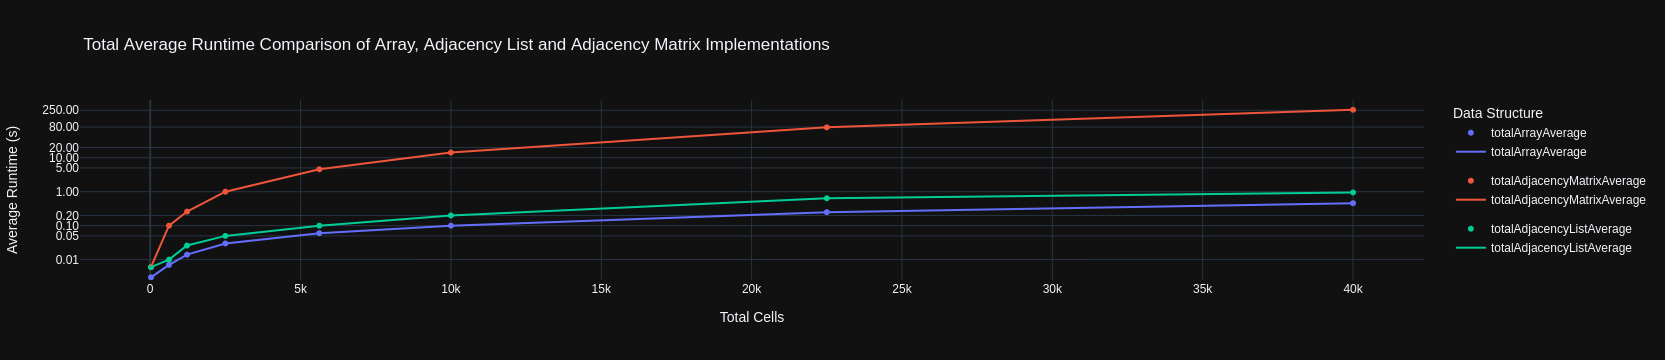

In [8]:
# Create a scatter plot
fig_scatter = px.scatter(
    data_frame=totalRuntimeAverageDF,
    x='totalCells',
    y=['totalArrayAverage', 'totalAdjacencyMatrixAverage', 'totalAdjacencyListAverage'],
    labels={'value': 'Average Runtime (s)', 'variable': 'Data Structure'},
    title='Total Cells vs. Average Runtime for Different Data Structures',
)

# Create a line plot
fig_line = px.line(
    data_frame=totalRuntimeAverageDF,
    x='totalCells',
    y=['totalArrayAverage', 'totalAdjacencyMatrixAverage', 'totalAdjacencyListAverage'],
    labels={'value': 'Average Runtime (s)', 'variable': 'Data Structure'},
)

# Combine the scatter and line plots
fig_combine = go.Figure(data=fig_scatter.data + fig_line.data)

# Update layout with logarithmic y-axis
fig_combine.update_layout(
    template='plotly_dark',
    title='Total Average Runtime Comparison of Array, Adjacency List and Adjacency Matrix Implementations',
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Data Structure',
    yaxis_type='log',
    yaxis_tickformat='.2f',  # 2 decimal places
    yaxis_tickvals=[0, 0.01, 0.05, 0.1, 0.2, 1, 5, 10, 20, 80, 250],  # Custom tick values
    yaxis_range=[-2.6, 2.7]
)

fig_combine.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Array Implementation Functions</h1>

In [9]:
arrayFunctionsDF = pd.read_excel('dataGen/empiricalData.xlsx', sheet_name='arrayFunctions')
arrayFunctionsDF.head()

,configNo,mazeSize,totalCells,__init__(),__init__() count,initCells(),initCells() count,addWall(),addWall() count,removeWall(),removeWall() count,hasWall(),hasWall() count,neighbours(),neighbours() count
0,1,5x5,25,0.00001,1,0.0001,1,0.000001,82,0.000001,28,0.000001,60,0.000001,43
1,2,25x25,625,0.00005,1,0.0020,1,0.000001,1402,0.000001,628,0.000001,1300,0.000001,1213
2,3,35x35,1225,0.00008,1,0.0035,1,0.000001,2662,0.000001,1228,0.000001,2520,0.000001,2415
3,4,50x50,2500,0.00015,1,0.0070,1,0.000001,5302,0.000001,2503,0.000001,5100,0.000001,4981
4,5,75x75,5625,0.00060,1,0.0150,1,0.000001,11702,0.000001,5628,0.000001,11400,0.000001,11232


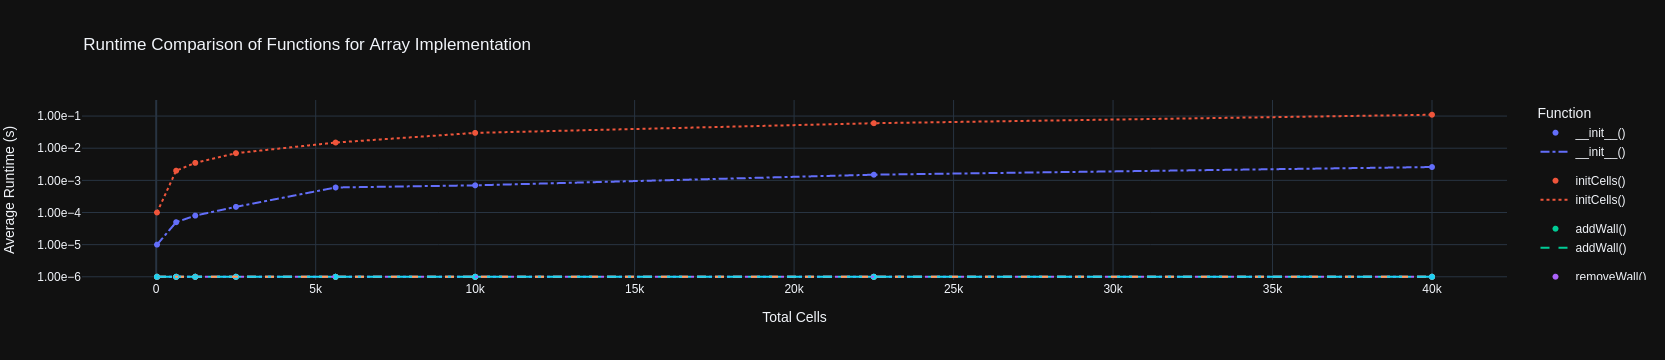

In [10]:
# Desired functions
functions = ['__init__()', 'initCells()', 'addWall()', 'removeWall()', 'hasWall()', 'neighbours()']

# Line styles and widths for each function
line_styles = ['dashdot', 'dot', 'dash', 'dashdot', 'dash', 'longdashdot']
line_widths = [2, 2, 2, 2, 2, 2]

# Create a scatter plot
fig_scatter = px.scatter(
    data_frame=arrayFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__()': '__init__()', 'initCells()': 'initCells()', 'addWall()': 'addWall()', 'removeWall()': 'removeWall()', 'hasWall()': 'hasWall()', 'neighbours()': 'neighbours()'},
    title='Total Cells vs. Average Runtime for Selected Array Functions',
    hover_data={'totalCells': ':.2f', 'value': ':.2e'}
)

# Create a line plot with different line styles and widths
fig_line = px.line(
    data_frame=arrayFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__()': '__init__()', 'initCells()': 'initCells()', 'addWall()': 'addWall()', 'removeWall()': 'removeWall()', 'hasWall()': 'hasWall()', 'neighbours()': 'neighbours()'},
    hover_data={'totalCells': ':.2f', 'value': ':.2e'}
)

# Combine the scatter and line plots
fig_combine = go.Figure(data=fig_scatter.data + fig_line.data)

# Update line styles and widths for each trace
for i, trace in enumerate(fig_combine.data[len(functions):]):
    trace.line.dash = line_styles[i]
    trace.line.width = line_widths[i]

# Update layout with logarithmic y-axis and scientific notation
fig_combine.update_layout(
    template='plotly_dark',
    title='Runtime Comparison of Functions for Array Implementation',
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Function',
    yaxis_type='log',
    yaxis_tickformat='.2e',  # decimal places
    yaxis_tickvals=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],  # tick values
    yaxis_range=[-6.1, -0.5],  
    hoverlabel=dict(namelength=-1) 
)

fig_combine.show()

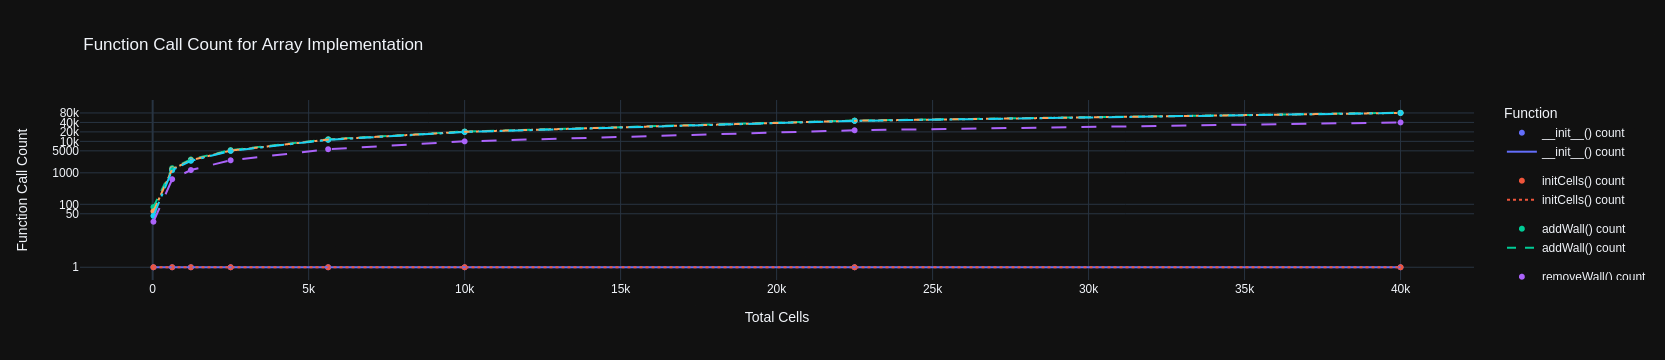

In [11]:
# Desired functions
functions = ['__init__() count', 'initCells() count', 'addWall() count', 'removeWall() count', 'hasWall() count', 'neighbours() count']

# Line styles and widths for each function
line_styles = ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
line_widths = [2, 2, 2, 2, 2, 2]

# Create a scatter plot
fig_scatter = px.scatter(
    data_frame=arrayFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__() count': '__init__() count', 'initCells() count': 'initCells() count', 'addWall() count': 'addWall() count', 'removeWall() count': 'removeWall() count', 'hasWall() count': 'hasWall() count', 'neighbours() count': 'neighbours() count'},
    title='Total Cells vs. Function Call Count',
)

# Create a line plot with different line styles and widths
fig_line = px.line(
    data_frame=arrayFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__() count': '__init__() count', 'initCells() count': 'initCells() count', 'addWall() count': 'addWall() count', 'removeWall() count': 'removeWall() count', 'hasWall() count': 'hasWall() count', 'neighbours() count': 'neighbours() count'},
)

# Combine the scatter and line plots
fig_combine = go.Figure(data=fig_scatter.data + fig_line.data)

# Line styles and widths for each trace
for i, trace in enumerate(fig_combine.data[len(functions):]):
    trace.line.dash = line_styles[i]
    trace.line.width = line_widths[i]

# Update layout with logarithmic y-axis and scientific notation
fig_combine.update_layout(
    template='plotly_dark',
    title='Function Call Count for Array Implementation',
    xaxis_title='Total Cells',
    yaxis_title='Function Call Count',
    legend_title='Function',
    yaxis_type='log',
    yaxis_tickvals=[0, 1, 50, 100, 1000, 5000, 10000, 20000, 40000, 80000],  # tick values
    hoverlabel=dict(namelength=-1) 
)

fig_combine.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Adjacency Matrix Functions</h1>

In [12]:
adjMatFunctionsDF = pd.read_excel('dataGen/empiricalData.xlsx', sheet_name='adjMatFunctions')
adjMatFunctionsDF.head()

,configNo,mazeSize,totalCells,__init__(),__init__() count,addVertex(),addVertex() count,addVertices(),addVertices() count,addEdge(),...,removeEdge(),removeEdge() count,hasVertex(),hasVertex() count,hasEdge(),hasEdge() count,getWallStatus(),getWallStatus() count,neighbours(),neighbours() count
0,1,5x5,25,0.000000,1,0.000005,45,0.00005,5,0.000002,...,NaN,0,NaN,0,0.000001,28,0.000003,60,0.000002,42
1,2,25x25,625,0.000001,1,0.000070,725,0.01000,5,0.000002,...,NaN,0,NaN,0,0.000001,628,0.000003,1300,0.000016,1203
2,3,35x35,1225,0.000001,1,0.000130,1365,0.03400,5,0.000002,...,NaN,0,NaN,0,0.000001,1228,0.000003,2470,0.000031,2423
3,4,50x50,2500,0.000001,1,0.000300,2700,0.14000,5,0.000002,...,NaN,0,NaN,0,0.000001,2503,0.000003,5100,0.000065,4962
4,5,75x75,5625,0.000001,1,0.000600,5925,0.70000,5,0.000002,...,NaN,0,NaN,0,0.000001,5628,0.000003,11400,0.000140,11226


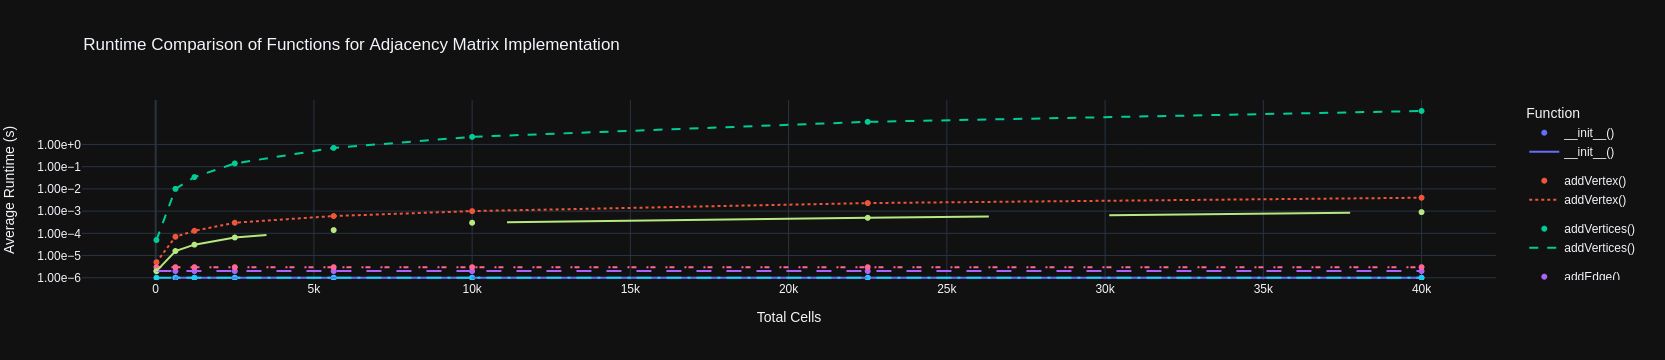

In [13]:
# Desired functions
functions = ['__init__()', 'addVertex()', 'addVertices()', 'addEdge()', 'removeEdge()', 'hasEdge()', 'getWallStatus()', 'neighbours()']

# Line styles and widths for each function
line_styles = ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot', '5px 10px 2px 2px', '10% 20% 40%']
line_widths = [2, 2, 2, 2, 2, 2, 2, 2]

# Create a scatter plot
fig_scatter = px.scatter(
    data_frame=adjMatFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__()': '__init__()', 'addVertex()': 'addVertex()', 'addVertices()': 'addVertices()', 'addEdge()': 'addEdge()', 'removeEdge()' : 'removeEdge()', 'hasEdge()': 'hasEdge', 'getWallStatus()': 'getWallStatus()', 'neighbours()': 'neighbours()'},
    title='Total Cells vs. Average Runtime for Selected Adjacency Matrix Functions',
    hover_data={'totalCells': ':.2f', 'value': ':.2e'}
)

# Create a line plot with different line styles and widths
fig_line = px.line(
    data_frame=adjMatFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__()': '__init__()', 'addVertex()': 'addVertex()', 'addVertices()': 'addVertices()', 'addEdge()': 'addEdge()', 'removeEdge()' : 'removeEdge()', 'hasEdge()': 'hasEdge', 'getWallStatus()': 'getWallStatus()', 'neighbours()': 'neighbours()'},
    hover_data={'totalCells': ':.2f', 'value': ':.2e'}
)

# Combine the scatter and line plots
fig_combine = go.Figure(data=fig_scatter.data + fig_line.data)

# Line styles and widths for each trace
for i, trace in enumerate(fig_combine.data[len(functions):]):
    trace.line.dash = line_styles[i]
    trace.line.width = line_widths[i]

# Update layout with logarithmic y-axis and scientific notation
fig_combine.update_layout(
    template='plotly_dark',
    title='Runtime Comparison of Functions for Adjacency Matrix Implementation',
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Function',
    yaxis_type='log',
    yaxis_tickformat='.2e',  # 2 decimal places
    yaxis_tickvals=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],  # tick values
    yaxis_range=[-6.1, 2], 
    hoverlabel=dict(namelength=-1)  
)

fig_combine.show()

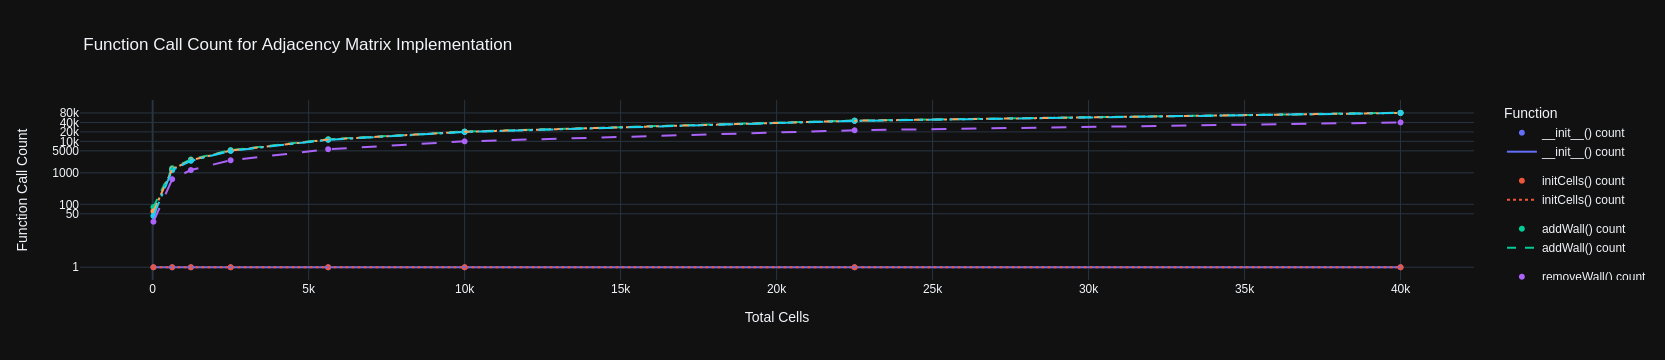

In [14]:
# Desired functions
functions = ['__init__() count', 'initCells() count', 'addWall() count', 'removeWall() count', 'hasWall() count', 'neighbours() count']

# Line styles and widths for each function
line_styles = ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
line_widths = [2, 2, 2, 2, 2, 2]

# Create a scatter plot
fig_scatter = px.scatter(
    data_frame=arrayFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__() count': '__init__() count', 'initCells() count': 'initCells() count', 'addWall() count': 'addWall() count', 'removeWall() count': 'removeWall() count', 'hasWall() count': 'hasWall() count', 'neighbours() count': 'neighbours() count'},
    title='Total Cells vs. Function Call Count',
)

# Create a line plot with different line styles and widths
fig_line = px.line(
    data_frame=arrayFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__() count': '__init__() count', 'initCells() count': 'initCells() count', 'addWall() count': 'addWall() count', 'removeWall() count': 'removeWall() count', 'hasWall() count': 'hasWall() count', 'neighbours() count': 'neighbours() count'},
)

# Combine the scatter and line plots
fig_combine = go.Figure(data=fig_scatter.data + fig_line.data)

# Update line styles and widths for each trace
for i, trace in enumerate(fig_combine.data[len(functions):]):
    trace.line.dash = line_styles[i]
    trace.line.width = line_widths[i]

# Update layout with logarithmic y-axis and scientific notation
fig_combine.update_layout(
    template='plotly_dark',
    title='Function Call Count for Adjacency Matrix Implementation',
    xaxis_title='Total Cells',
    yaxis_title='Function Call Count',
    legend_title='Function',
    yaxis_type='log',
    yaxis_tickvals=[0, 1, 50, 100, 1000, 5000, 10000, 20000, 40000, 80000],  # tick values
    hoverlabel=dict(namelength=-1)
)

fig_combine.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Adjacency List Functions</h1>

In [15]:
adjListFunctionsDF = pd.read_excel('dataGen/empiricalData.xlsx', sheet_name='adjListFunctions')
adjListFunctionsDF.head()

,configNo,mazeSize,totalCells,__init__(),__init__() count,addVertex(),addVertex() count,addVertices(),addVertices() count,addEdge(),...,removeEdge(),removeEdge() count,hasVertex(),hasVertex() count,hasEdge(),hasEdge() count,getWallStatus(),getWallStatus() count,neighbours(),neighbours() count
0,1,5x5,25,0,1,0.000001,45,0.00001,5,0.000002,...,NaN,0,NaN,0,0.000002,28,0.000003,60,0.000001,30
1,2,25x25,625,0,1,0.000001,725,0.00014,5,0.000002,...,NaN,0,NaN,0,0.000002,628,0.000003,1300,0.000001,1213
2,3,35x35,1225,0,1,0.000001,1365,0.00029,5,0.000002,...,NaN,0,NaN,0,0.000002,1228,0.000003,2520,0.000001,2432
3,4,50x50,2500,0,1,0.000001,2700,0.00050,5,0.000002,...,NaN,0,NaN,0,0.000002,2503,0.000003,5100,0.000001,4988
4,5,75x75,5625,0,1,0.000001,5925,0.00110,5,0.000002,...,NaN,0,NaN,0,0.000002,5628,0.000003,11400,0.000001,11222


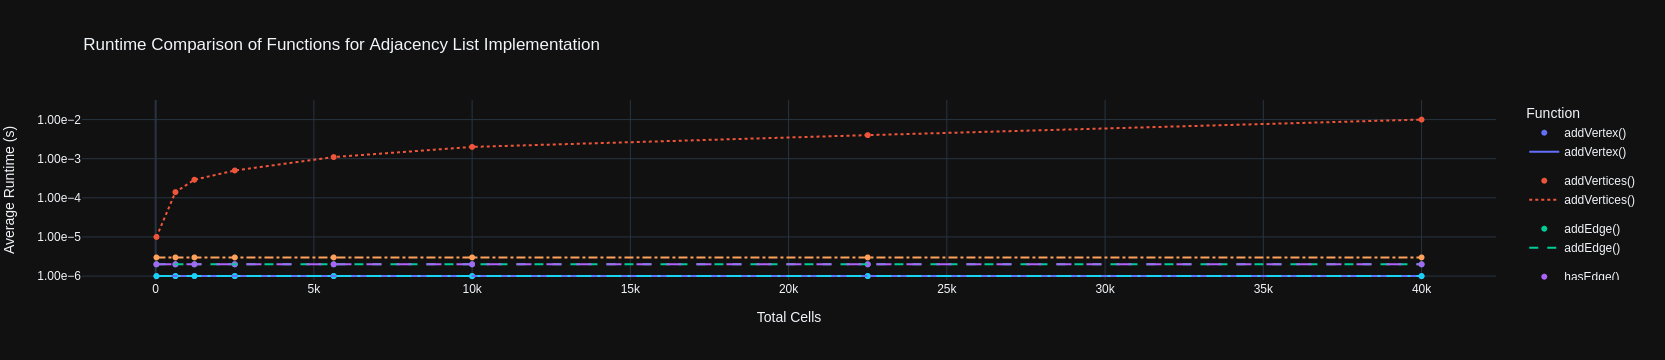

In [16]:
# Desired functions
functions = ['addVertex()', 'addVertices()', 'addEdge()', 'hasEdge()', 'getWallStatus()', 'neighbours()']

# Line styles and widths for each function
line_styles = ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot', 'dot', 'dash', '5px 10px 2px 2px', '10% 20% 40%']
line_widths = [2, 2, 2, 2, 2, 2, 2, 2]

# Create a scatter plot
fig_scatter = px.scatter(
    data_frame=adjListFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', 'addVertex()': 'addVertex()', 'addVertices()': 'addVertices()', 'addEdge()': 'addEdge()', 'hasEdge()': 'hasEdge', 'getWallStatus()': 'getWallStatus()', 'neighbours()': 'neighbours()'},
    title='Total Cells vs. Average Runtime for Selected Adjacency Matrix Functions',
    hover_data={'totalCells': ':.2f', 'value': ':.2e'}
)

# Create a line plot with different line styles and widths
fig_line = px.line(
    data_frame=adjListFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', 'addVertex()': 'addVertex()', 'addVertices()': 'addVertices()', 'addEdge()': 'addEdge()', 'hasEdge()': 'hasEdge', 'getWallStatus()': 'getWallStatus()', 'neighbours()': 'neighbours()'},
    hover_data={'totalCells': ':.2f', 'value': ':.2e'}
)

# Combine the scatter and line plots
fig_combine = go.Figure(data=fig_scatter.data + fig_line.data)

# Line styles and widths for each trace
for i, trace in enumerate(fig_combine.data[len(functions):]):
    trace.line.dash = line_styles[i]
    trace.line.width = line_widths[i]

# Update layout with logarithmic y-axis and scientific notation
fig_combine.update_layout(
    template='plotly_dark',
    title='Runtime Comparison of Functions for Adjacency List Implementation',
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Function',
    yaxis_type='log',
    yaxis_tickformat='.2e',  # 2 decimal places
    yaxis_tickvals=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],  # tick values
    yaxis_range=[-6.1, -1.5], 
    hoverlabel=dict(namelength=-1) 
)

fig_combine.show()

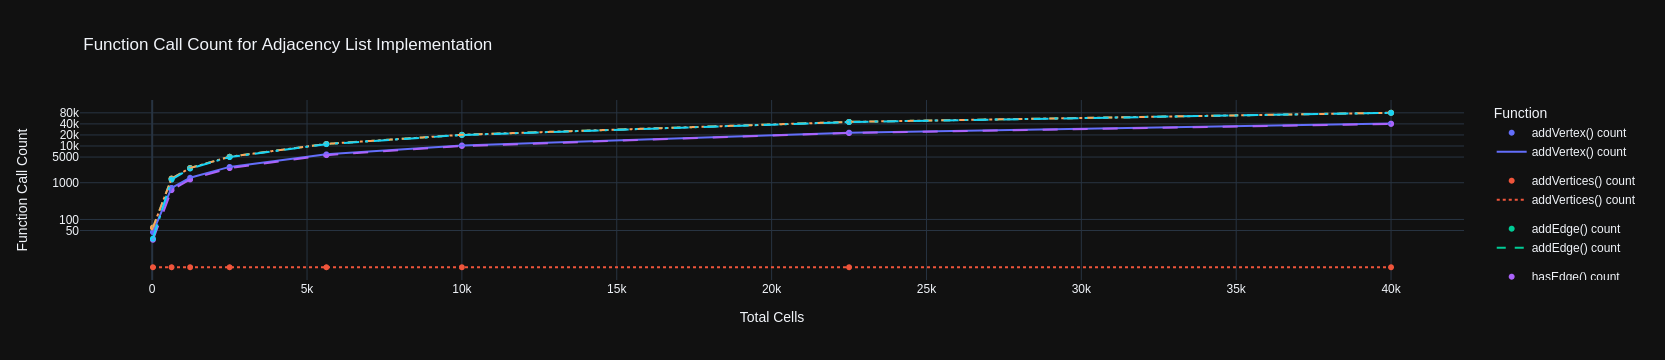

In [17]:
# Desired functions
functions = ['addVertex() count', 'addVertices() count', 'addEdge() count', 'hasEdge() count', 'getWallStatus() count', 'neighbours() count']

# Line styles and widths for each function
line_styles = ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot', '5px 10px 2px 2px', '10% 20% 40%']
line_widths = [2, 2, 2, 2, 2, 2, 2, 2]

# Create a scatter plot
fig_scatter = px.scatter(
    data_frame=adjListFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', 'addVertex() count': 'addVertex() count', 'addVertices() count': 'addVertices() count', 'addEdge() count': 'addEdge() count', 'hasEdge() count': 'hasEdge() count', 'getWallStatus() count': 'getWallStatus() count', 'neighbours() count': 'neighbours() count'},
    title='Total Cells vs. Average Runtime for Selected Adjacency Matrix Functions',
)

# Create a line plot with different line styles and widths
fig_line = px.line(
    data_frame=adjListFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', 'addVertex() count': 'addVertex() count', 'addVertices() count': 'addVertices() count', 'addEdge() count': 'addEdge() count', 'hasEdge() count': 'hasEdge() count', 'getWallStatus() count': 'getWallStatus() count', 'neighbours() count': 'neighbours() count'},
)

# Combine the scatter and line plots
fig_combine = go.Figure(data=fig_scatter.data + fig_line.data)

# Line styles and widths for each trace
for i, trace in enumerate(fig_combine.data[len(functions):]):
    trace.line.dash = line_styles[i]
    trace.line.width = line_widths[i]

# Update layout with logarithmic y-axis and scientific notation
fig_combine.update_layout(
    template='plotly_dark',
    title='Function Call Count for Adjacency List Implementation',
    xaxis_title='Total Cells',
    yaxis_title='Function Call Count',
    legend_title='Function',
    yaxis_type='log',
    yaxis_tickvals=[0, 1, 50, 100, 1000, 5000, 10000, 20000, 40000, 80000],  # tick values
    hoverlabel=dict(namelength=-1)
)

fig_combine.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">neighbours() Function</h1>

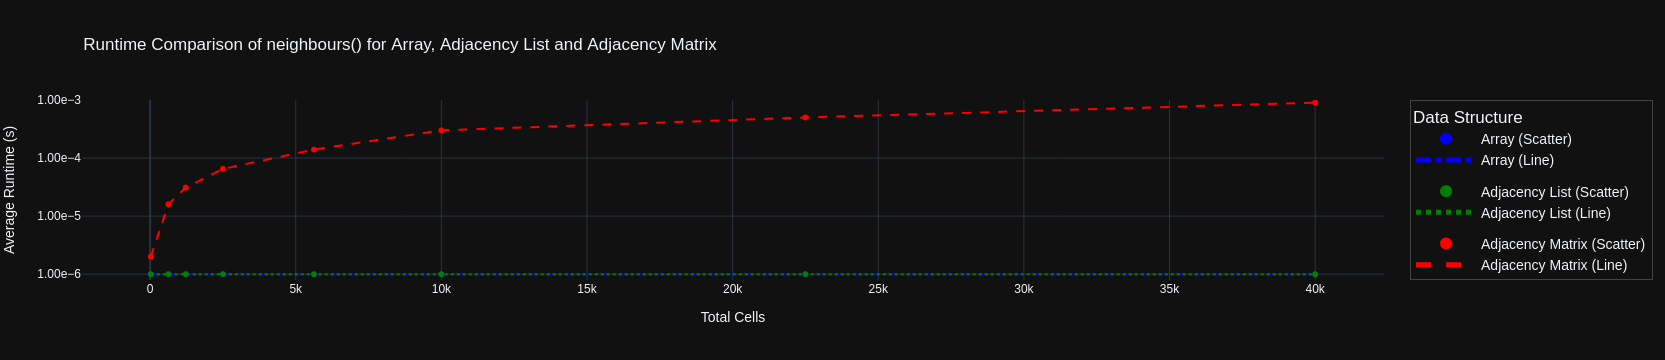

In [25]:
# Create scatter plot for Array
array_scatter = go.Scatter(
    x=arrayFunctionsDF['totalCells'],
    y=arrayFunctionsDF['neighbours()'],
    mode='markers',
    marker=dict(color='blue'),
    legendgroup='Array',
    name='Array (Scatter)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create line plot for Array
array_line = go.Scatter(
    x=arrayFunctionsDF['totalCells'],
    y=arrayFunctionsDF['neighbours()'],
    mode='lines',
    line=dict(color='blue', dash='dashdot'),
    legendgroup='Array',
    name='Array (Line)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create scatter plot for Adjacency List
adjlist_scatter = go.Scatter(
    x=adjListFunctionsDF['totalCells'],
    y=adjListFunctionsDF['neighbours()'],
    mode='markers',
    marker=dict(color='green'),
    legendgroup='Adjacency List',
    name='Adjacency List (Scatter)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create line plot for Adjacency List
adjlist_line = go.Scatter(
    x=adjListFunctionsDF['totalCells'],
    y=adjListFunctionsDF['neighbours()'],
    mode='lines',
    line=dict(color='green', dash='dot'),
    legendgroup='Adjacency List',
    name='Adjacency List (Line)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create scatter plot for Adjacency Matrix
adjmat_scatter = go.Scatter(
    x=adjMatFunctionsDF['totalCells'],
    y=adjMatFunctionsDF['neighbours()'],
    mode='markers',
    marker=dict(color='red'),
    legendgroup='Adjacency Matrix',
    name='Adjacency Matrix (Scatter)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create the line plot for Adjacency Matrix
adjmat_line = go.Scatter(
    x=adjMatFunctionsDF['totalCells'],
    y=adjMatFunctionsDF['neighbours()'],
    mode='lines',
    line=dict(color='red', dash='dash'),
    legendgroup='Adjacency Matrix',
    name='Adjacency Matrix (Line)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Combine scatter and line plots for all data structures
fig_combine = go.Figure(data=[array_scatter, array_line, adjlist_scatter, adjlist_line, adjmat_scatter, adjmat_line])

fig_combine.update_layout(
    template='plotly_dark',
    title='Runtime Comparison of neighbours() for Array, Adjacency List and Adjacency Matrix',
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Data Structure',
    yaxis_type='log',
    yaxis_tickformat='.2e',  # 2 decimal places
    yaxis_tickvals=[0, 1e-6, 1e-5, 1e-4, 1e-3],  # tick values
    yaxis_range=[-6.1, -3],
    hoverlabel=dict(namelength=-1),
    legend=dict(
        font=dict(size=14), 
        itemsizing='constant', 
        itemwidth=60, 
        itemclick='toggleothers',  
        borderwidth=1 
    )
)

fig_combine.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">updateWall() Function</h1>

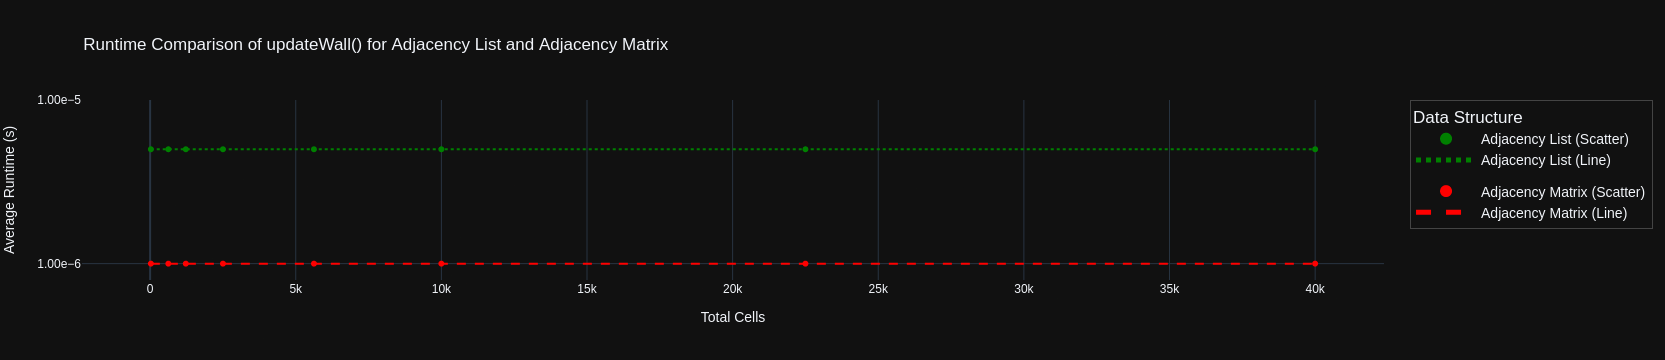

In [19]:
# Create scatter plot for Adjacency List
adjlist_scatter = go.Scatter(
    x=adjListFunctionsDF['totalCells'],
    y=adjListFunctionsDF['updateWall()'],
    mode='markers',
    marker=dict(color='green'),
    legendgroup='Adjacency List',
    name='Adjacency List (Scatter)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create line plot for Adjacency List
adjlist_line = go.Scatter(
    x=adjListFunctionsDF['totalCells'],
    y=adjListFunctionsDF['updateWall()'],
    mode='lines',
    line=dict(color='green', dash='dot'),
    legendgroup='Adjacency List',
    name='Adjacency List (Line)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create scatter plot for Adjacency Matrix
adjmat_scatter = go.Scatter(
    x=adjMatFunctionsDF['totalCells'],
    y=adjMatFunctionsDF['updateWall()'],
    mode='markers',
    marker=dict(color='red'),
    legendgroup='Adjacency Matrix',
    name='Adjacency Matrix (Scatter)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create line plot for Adjacency Matrix
adjmat_line = go.Scatter(
    x=adjMatFunctionsDF['totalCells'],
    y=adjMatFunctionsDF['updateWall()'],
    mode='lines',
    line=dict(color='red', dash='dash'),
    legendgroup='Adjacency Matrix',
    name='Adjacency Matrix (Line)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Combine scatter and line plots for all data structures
fig_combine = go.Figure(data=[adjlist_scatter, adjlist_line, adjmat_scatter, adjmat_line])

# Update layout with logarithmic y-axis, scientific notation, and larger legend
fig_combine.update_layout(
    template='plotly_dark',
    title='Runtime Comparison of updateWall() for Adjacency List and Adjacency Matrix',
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Data Structure',
    yaxis_type='log',
    yaxis_tickformat='.2e',  # 2 decimal places
    yaxis_tickvals=[1e-7, 1e-6, 1e-5],  # tick values
    yaxis_range=[-6.1, -5],  # 
    hoverlabel=dict(namelength=-1),
    legend=dict(
        font=dict(size=14), 
        itemsizing='constant',  
        itemwidth=60, 
        itemclick='toggleothers',  
        borderwidth=1  
    )
)

fig_combine.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Vertical Mazes</h1>

In [20]:
verticalMazesDF = pd.read_excel('dataGen/empiricalData.xlsx', sheet_name='verticalMaze')
verticalMazesDF.head()

,configNo,mazeSize,totalCells,totalArrayAverage,totalAdjacencyMatrixAverage,totalAdjacencyListAverage
0,1,10x5,50,0.0006,0.0015,0.0014
1,2,25x5,125,0.0014,0.0060,0.0030
2,3,50x5,250,0.0030,0.0190,0.0060
3,4,100x5,500,0.0060,0.0700,0.0120
4,5,200x5,1000,0.0100,0.2700,0.0220


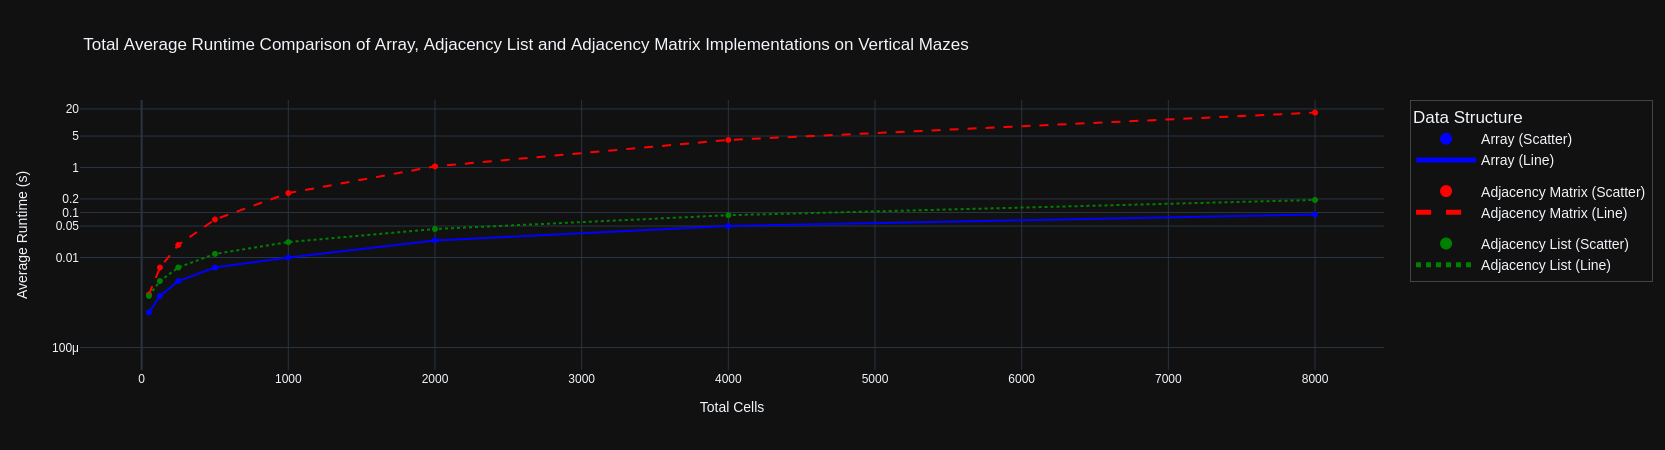

In [21]:
# Create a scatter plot
fig_scatter = px.scatter(
    data_frame=verticalMazesDF,
    x='totalCells',
    y=['totalArrayAverage', 'totalAdjacencyMatrixAverage', 'totalAdjacencyListAverage'],
    labels={'value': 'Average Runtime (s)', 'variable': 'Data Structure'},
    title='Total Cells vs. Average Runtime for Different Data Structures'
)

# Create a line plot for Array
array_line = go.Scatter(
    x=verticalMazesDF['totalCells'],
    y=verticalMazesDF['totalArrayAverage'],
    mode='lines',
    line=dict(color='blue', dash='solid'),
    legendgroup='Array',
    name='Array (Line)',
)

# Create scatter plot for Array
array_scatter = go.Scatter(
    x=verticalMazesDF['totalCells'],
    y=verticalMazesDF['totalArrayAverage'],
    mode='markers',
    marker=dict(color='blue'),
    legendgroup='Array',
    name='Array (Scatter)',
)

# Create line plot for Adjacency Matrix
adjmat_line = go.Scatter(
    x=verticalMazesDF['totalCells'],
    y=verticalMazesDF['totalAdjacencyMatrixAverage'],
    mode='lines',
    line=dict(color='red', dash='dash'),
    legendgroup='Adjacency Matrix',
    name='Adjacency Matrix (Line)',
)

# Create scatter plot for Adjacency Matrix
adjmat_scatter = go.Scatter(
    x=verticalMazesDF['totalCells'],
    y=verticalMazesDF['totalAdjacencyMatrixAverage'],
    mode='markers',
    marker=dict(color='red'),
    legendgroup='Adjacency Matrix',
    name='Adjacency Matrix (Scatter)',
)

# Create line plot for Adjacency List
adjlist_line = go.Scatter(
    x=verticalMazesDF['totalCells'],
    y=verticalMazesDF['totalAdjacencyListAverage'],
    mode='lines',
    line=dict(color='green', dash='dot'),
    legendgroup='Adjacency List',
    name='Adjacency List (Line)',
)

# Create scatter plot for Adjacency List
adjlist_scatter = go.Scatter(
    x=verticalMazesDF['totalCells'],
    y=verticalMazesDF['totalAdjacencyListAverage'],
    mode='markers',
    marker=dict(color='green'),
    legendgroup='Adjacency List',
    name='Adjacency List (Scatter)',
)

# Combine scatter and line plots for all data structures
fig_combine = go.Figure(data=[array_scatter, array_line, adjmat_scatter, adjmat_line, adjlist_scatter, adjlist_line])

fig_combine.update_layout(
    template='plotly_dark',
    title='Total Average Runtime Comparison of Array, Adjacency List and Adjacency Matrix Implementations on Vertical Mazes',
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Data Structure',
    yaxis_type='log',
    yaxis_tickvals=[1e-4, 0.01, 0.05, 0.1, 0.2, 1, 5, 20],  # tick values
    yaxis_range=[-4.5, 1.5],  
    legend=dict(
        font=dict(size=14),  
        itemsizing='constant',  
        itemwidth=60,  
        itemclick='toggleothers',  
        borderwidth=1  
    ),
    height=450 
)

fig_combine.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Horizontal Mazes</h1>

In [22]:
horizontalMazesDF = pd.read_excel('dataGen/empiricalData.xlsx', sheet_name='horizontalMaze')
horizontalMazesDF.head()

,configNo,mazeSize,totalCells,totalArrayAverage,totalAdjacencyMatrixAverage,totalAdjacencyListAverage
0,1,5x10,50,0.0005,0.0021,0.0010
1,2,5x25,125,0.0013,0.0070,0.0025
2,3,5x50,250,0.0030,0.0200,0.0050
3,4,5x100,500,0.0060,0.0700,0.0100
4,5,5x200,1000,0.0120,0.2600,0.0200


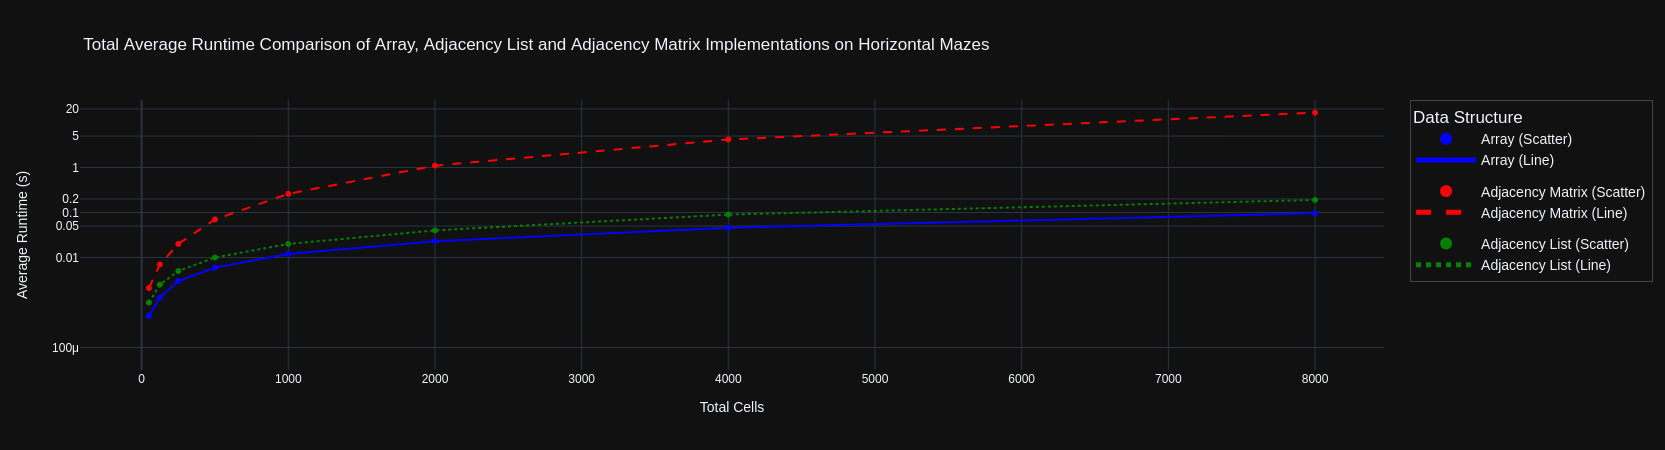

In [23]:
# Create scatter plot
fig_scatter = px.scatter(
    data_frame=horizontalMazesDF,
    x='totalCells',
    y=['totalArrayAverage', 'totalAdjacencyMatrixAverage', 'totalAdjacencyListAverage'],
    labels={'value': 'Average Runtime (s)', 'variable': 'Data Structure'},
    title='Total Cells vs. Average Runtime for Different Data Structures'
)

# Create line plot for Array
array_line = go.Scatter(
    x=horizontalMazesDF['totalCells'],
    y=horizontalMazesDF['totalArrayAverage'],
    mode='lines',
    line=dict(color='blue', dash='solid'),
    legendgroup='Array',
    name='Array (Line)',
)

# Create scatter plot for Array
array_scatter = go.Scatter(
    x=horizontalMazesDF['totalCells'],
    y=horizontalMazesDF['totalArrayAverage'],
    mode='markers',
    marker=dict(color='blue'),
    legendgroup='Array',
    name='Array (Scatter)',
)

# Create line plot for Adjacency Matrix
adjmat_line = go.Scatter(
    x=horizontalMazesDF['totalCells'],
    y=horizontalMazesDF['totalAdjacencyMatrixAverage'],
    mode='lines',
    line=dict(color='red', dash='dash'),
    legendgroup='Adjacency Matrix',
    name='Adjacency Matrix (Line)',
)

# Create scatter plot for Adjacency Matrix
adjmat_scatter = go.Scatter(
    x=horizontalMazesDF['totalCells'],
    y=horizontalMazesDF['totalAdjacencyMatrixAverage'],
    mode='markers',
    marker=dict(color='red'),
    legendgroup='Adjacency Matrix',
    name='Adjacency Matrix (Scatter)',
)

# Create line plot for Adjacency List
adjlist_line = go.Scatter(
    x=horizontalMazesDF['totalCells'],
    y=horizontalMazesDF['totalAdjacencyListAverage'],
    mode='lines',
    line=dict(color='green', dash='dot'),
    legendgroup='Adjacency List',
    name='Adjacency List (Line)',
)

# Create scatter plot for Adjacency List
adjlist_scatter = go.Scatter(
    x=horizontalMazesDF['totalCells'],
    y=horizontalMazesDF['totalAdjacencyListAverage'],
    mode='markers',
    marker=dict(color='green'),
    legendgroup='Adjacency List',
    name='Adjacency List (Scatter)',
)

# Combine scatter and line plots for all data structures
fig_combine = go.Figure(data=[array_scatter, array_line, adjmat_scatter, adjmat_line, adjlist_scatter, adjlist_line])

fig_combine.update_layout(
    template='plotly_dark',
    title='Total Average Runtime Comparison of Array, Adjacency List and Adjacency Matrix Implementations on Horizontal Mazes',
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Data Structure',
    yaxis_type='log',
    yaxis_tickvals=[1e-4, 0.01, 0.05, 0.1, 0.2, 1, 5, 20],  # tick values
    yaxis_range=[-4.5, 1.5], 
    legend=dict(
        font=dict(size=14), 
        itemsizing='constant', 
        itemwidth=60,  
        itemclick='toggleothers',  
        borderwidth=1  
    ),
    height=450  
)

fig_combine.show()